# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

# Initialise & Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split

DATADIR = "Credit Card Fraud Detection\creditcard.csv"

# Load Data

In [2]:
full_data = pd.read_csv(DATADIR)
full_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
full_data.shape

(284807, 31)

In [4]:
full_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Check Missing Values

In [5]:
full_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
full_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
print('No Frauds', round(full_data['Class'].value_counts()[0]/len(full_data) * 100,2), '% of the dataset')
print('Frauds', round(full_data['Class'].value_counts()[1]/len(full_data) * 100,2), '% of the dataset')

print('No Frauds', round(full_data['Class'].value_counts()[0]), 'rows of the dataset')
print('Frauds', round(full_data['Class'].value_counts()[1]), 'rows of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
No Frauds 284315 rows of the dataset
Frauds 492 rows of the dataset


In [9]:
#shuffle df
full_data = full_data.sample(frac=1) 

#get equal rows to balance data
fraud_df = full_data[full_data['Class']==1]
no_fraud_df = full_data.loc[full_data['Class']==0] [:492]

# combine both dfs
normal_distributed_df = pd.concat([fraud_df, no_fraud_df])

normal_distributed_df = normal_distributed_df.sample(frac=1)
normal_distributed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 89928 to 201224
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64


In [10]:
normal_distributed_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89928,62791.0,-0.769387,1.486710,2.207643,3.371272,0.132042,0.358766,0.581417,0.073400,-2.068553,...,0.101931,0.156824,-0.036302,0.507836,-0.622604,-0.175294,-0.075466,0.139174,44.63,0
263080,160791.0,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
68630,53073.0,1.353207,-0.552880,0.078374,-0.751937,-0.823627,-0.629895,-0.432142,-0.100756,-1.112071,...,-0.352057,-0.619378,-0.018133,0.029693,0.269840,1.042880,-0.075797,-0.006751,24.85,0
11880,20451.0,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.00,1
3191,2770.0,1.226681,0.636130,0.083839,2.500712,0.063233,-0.877783,0.459263,-0.192077,-0.814186,...,-0.032920,-0.194096,-0.085617,0.353474,0.675996,0.073408,-0.050325,0.006880,3.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85963,61015.0,-3.066954,0.980523,0.242506,0.573535,-1.282292,0.245923,-0.051251,1.288835,-0.155351,...,0.014499,-0.007364,-0.290587,-0.054010,0.727941,-0.386272,-0.622990,-0.240529,154.26,0
150715,93965.0,-11.397727,7.763953,-18.572307,6.711855,-10.174216,-4.395918,-15.893788,2.083013,-4.988837,...,0.339007,1.342923,0.239217,0.534644,-0.174965,-0.500240,-1.722060,-0.574339,11.40,1
206375,136186.0,-0.693560,0.439166,0.032770,1.182889,1.571727,-1.300062,0.968685,-0.233963,-0.611968,...,0.189876,0.621403,-0.095924,0.000209,0.069442,-0.375620,0.405686,0.260191,29.10,0
154684,102572.0,-28.709229,22.057729,-27.855811,11.845013,-18.983813,6.474115,-43.557242,-41.044261,-13.320155,...,-22.797604,8.316275,5.466230,0.023854,-1.527145,-0.145225,-5.682338,-0.439134,0.01,1


# Standardized the Input Variables

In [11]:
x = normal_distributed_df.loc[:, normal_distributed_df.columns != 'Class']
y = normal_distributed_df.loc[:, normal_distributed_df.columns == 'Class']


In [12]:
x = (x-x.mean())/x.std()

In [13]:
y = np.asarray(y).astype('float64')

In [14]:
y

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],

# Split Data

In [15]:
#Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels)
train_ratio = 0.50
validation_ratio = 0.20
test_ratio = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1-train_ratio, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

print('Train: {} - Val: {} - Test: {}'.format(len(x_train) , len(x_val) , len(x_test)))

Train: 492 - Val: 196 - Test: 296


# Create Model 

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

Network = models.Sequential()
Network.add(layers.Dense(100, activation='relu', input_shape=(x_train.shape[1],) ))
Network.add(layers.Dropout(0.2))
Network.add(layers.Dense(80, activation='relu' ))
Network.add(layers.Dropout(0.2))
Network.add(layers.Dense(1, activation='sigmoid'))

# Compilation
Network.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

#Train Model
history = Network.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val))

Train on 492 samples, validate on 196 samples
Epoch 1/25
492/492 [==============================] - 1s 2ms/sample - loss: 0.1930 - accuracy: 0.7236 - val_loss: 0.1219 - val_accuracy: 0.8980
Epoch 2/25
492/492 [==============================] - 0s 167us/sample - loss: 0.1128 - accuracy: 0.8821 - val_loss: 0.0907 - val_accuracy: 0.8980
Epoch 3/25
492/492 [==============================] - 0s 173us/sample - loss: 0.0856 - accuracy: 0.9106 - val_loss: 0.0745 - val_accuracy: 0.9082
Epoch 4/25
492/492 [==============================] - 0s 127us/sample - loss: 0.0748 - accuracy: 0.9085 - val_loss: 0.0662 - val_accuracy: 0.9133
Epoch 5/25
492/492 [==============================] - 0s 131us/sample - loss: 0.0611 - accuracy: 0.9289 - val_loss: 0.0584 - val_accuracy: 0.9235
Epoch 6/25
492/492 [==============================] - 0s 132us/sample - loss: 0.0548 - accuracy: 0.9309 - val_loss: 0.0544 - val_accuracy: 0.9235
Epoch 7/25
492/492 [==============================] - 0s 128us/sample - loss: 0.

# Ploting

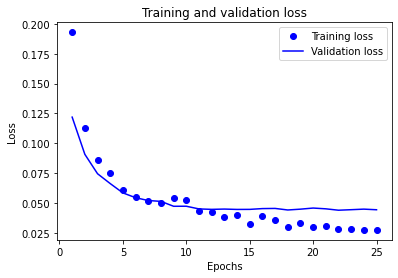

In [22]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

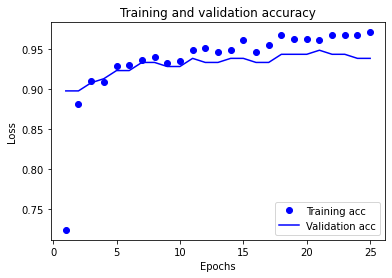

In [23]:
#Plotting the training and validation accuracy

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate Model

In [24]:
#Check Model performance of Train Data
train_loss,train_acc=Network.evaluate(x_train, y_train)
print("Accuracy: ",train_acc*100,"\nTrain Loss Value:",train_loss)
#y_train[15]

492/492 [==============================] - 0s 70us/sample - loss: 0.0208 - accuracy: 0.9756
Accuracy:  97.56097793579102 
Train Loss Value: 0.020763559009486097


In [25]:
#Check Model performance of Test Data
test_loss,test_acc=Network.evaluate(x_test, y_test)
print("Accuracy: ",test_acc*100,"\nTest Loss Value:",test_loss)

296/296 [==============================] - 0s 71us/sample - loss: 0.0396 - accuracy: 0.9527
Accuracy:  95.27027010917664 
Test Loss Value: 0.03958414340505024


# Prediction

In [20]:
Network.predict(x_test)

array([[0.99974304],
       [0.03081153],
       [0.9956025 ],
       [0.75642157],
       [1.        ],
       [0.00862094],
       [0.0038246 ],
       [1.        ],
       [0.9987696 ],
       [1.        ],
       [0.9995547 ],
       [0.99962425],
       [1.        ],
       [1.        ],
       [0.9987037 ],
       [0.02308619],
       [0.9996809 ],
       [0.35123816],
       [1.        ],
       [0.9999999 ],
       [0.0038743 ],
       [0.8741184 ],
       [0.99978775],
       [0.98133457],
       [0.9999949 ],
       [1.        ],
       [0.01946439],
       [0.00237647],
       [0.0049271 ],
       [0.93937135],
       [0.01453151],
       [1.        ],
       [0.01800895],
       [0.13133517],
       [0.46542603],
       [0.9999546 ],
       [1.        ],
       [0.00376831],
       [0.99831724],
       [0.00655125],
       [0.9999875 ],
       [1.        ],
       [0.00143673],
       [0.01559033],
       [1.        ],
       [0.0180143 ],
       [0.01591826],
       [1.   

In [67]:
predictions = Network.predict(x_test)
# show the inputs and predicted outputs
for i in range(10):
    print("Predicted Value: {} -- Original Value: {}"
          .format(np.argmax(predictions[i]), np.argmax(y_test[i])))

Predicted Value: 0 -- Original Value: 0
Predicted Value: 1 -- Original Value: 1
Predicted Value: 1 -- Original Value: 0
Predicted Value: 0 -- Original Value: 0
Predicted Value: 1 -- Original Value: 1
Predicted Value: 0 -- Original Value: 0
Predicted Value: 0 -- Original Value: 1
Predicted Value: 1 -- Original Value: 1
Predicted Value: 0 -- Original Value: 0
Predicted Value: 1 -- Original Value: 1
